In [134]:
# coding: utf-8
%matplotlib inline
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sbn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from random import sample




In [135]:
# read the csv file
df = pd.read_csv("cleaned_foodfacts.csv", sep='\t',low_memory=False)

In [136]:
# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

(320685, 29)
Index(['code', 'product_name', 'brands', 'brands_tags', 'categories_fr',
       'origins', 'manufacturing_places', 'countries', 'countries_tags',
       'countries_fr', 'ingredients_text', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_fr',
       'main_category_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')


In [137]:
##Observe the numerical data in the dataframe

In [138]:
df.describe().style


,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,248939,248939,0,248939,0,261113,243887,229551,243569,244952,200881,259918,255352,255429,221210
mean,1.93602,0.0196594,nan,0.0552465,nan,1141.91,12.7253,5.12592,32.0553,15.9854,2.83247,7.07941,1.5885,0.647145,9.16554
std,2.50202,0.140524,nan,0.269207,nan,6447.15,17.5037,7.91368,29.1407,21.1654,4.58827,8.15655,6.24253,2.65634,9.0559
min,0,0,nan,0,nan,0,0,0,0,0,0,0,0,0,-15
25%,0,0,nan,0,nan,377,0,0,6,1.3,0,0.7,0.0635,0.025,1
50%,1,0,nan,0,nan,1100,5,1.79,20.6,5.71,1.5,4.76,0.58,0.229,10
75%,3,0,nan,0,nan,1674,20,7.14,58.33,24,3.6,10,1.3716,0.541,16
max,31,2,nan,6,nan,3.25137e+06,100,100,100,100,100,100,100,100,40


In [139]:
##Remove rows where palm oil presence is NaN or 0

In [140]:
df_palmoil=df[df.main_category_fr.notna() & df.ingredients_from_palm_oil_n.notna() & df.ingredients_from_palm_oil_n!=0]
print(df_palmoil.shape)
print(df_palmoil['main_category_fr'].value_counts())


(3887, 29)
Biscuits                                   666
Chocolats                                  296
Snacks sucrés                              287
Petit-déjeuners                            238
Gâteaux                                    161
Pains                                      154
Bonbons                                    150
Gaufres                                    118
Produits à tartiner salés                  115
Cookies                                    115
Snacks salés                               114
Plats préparés                             106
Pâtes à tartiner                           101
Glaces                                      89
Epicerie                                    88
Soupes                                      86
Pâtisseries                                 76
Tartes                                      67
Pâtes à tarte                               65
Aliments et boissons à base de végétaux     64
Surgelés                                    63
Al

In [141]:
##Add a simpler categories column: gen_categories, it only takes the main category tag for each product

In [142]:
for x in df_palmoil['main_category_fr'].unique():
    if df_palmoil['main_category_fr'].value_counts()[x]<17:
        df_palmoil['main_category_fr'].replace(to_replace=x,value='Autres',inplace=True)
        

In [143]:
print(df_palmoil['main_category_fr'].value_counts())

Biscuits                                   666
Autres                                     328
Chocolats                                  296
Snacks sucrés                              287
Petit-déjeuners                            238
Gâteaux                                    161
Pains                                      154
Bonbons                                    150
Gaufres                                    118
Produits à tartiner salés                  115
Cookies                                    115
Snacks salés                               114
Plats préparés                             106
Pâtes à tartiner                           101
Glaces                                      89
Epicerie                                    88
Soupes                                      86
Pâtisseries                                 76
Tartes                                      67
Pâtes à tarte                               65
Aliments et boissons à base de végétaux     64
Surgelés     

Text(0.5,1,"Nombre d'aliments contenant de l'huile de palme par catégorie")

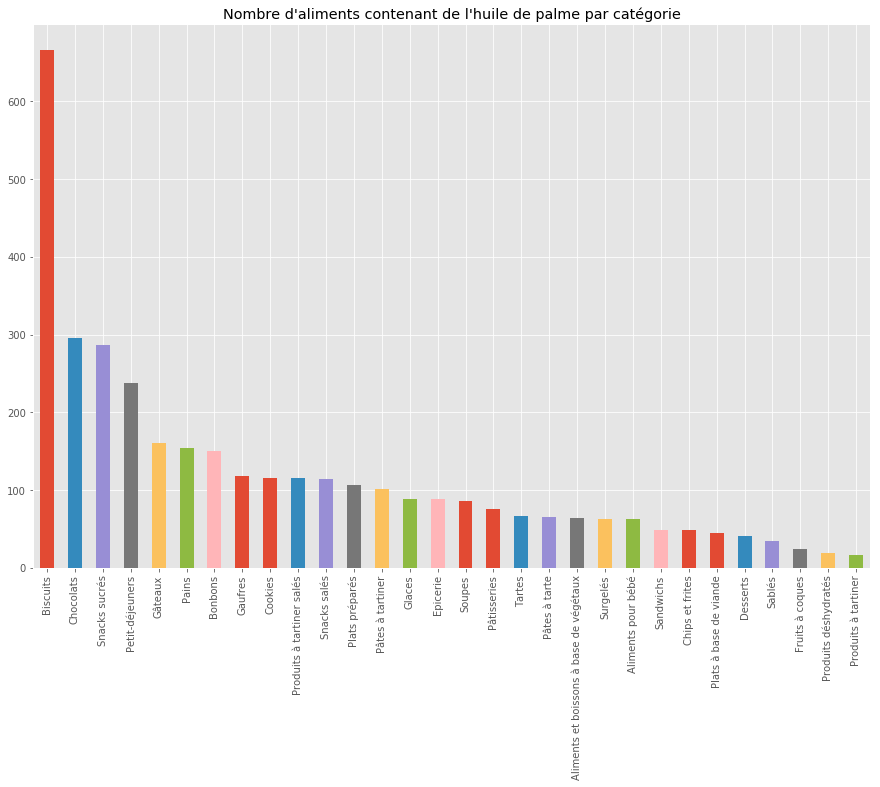

In [144]:
matplotlib.style.use('ggplot')
df_cats=df_palmoil[df_palmoil['main_category_fr']!='Autres']
df_cats['main_category_fr'].value_counts().plot.bar(figsize=(15,10))
plt.ylabel('')
plt.title("Nombre d\'aliments contenant de l\'huile de palme par catégorie" )

In [145]:
print(df_palmoil['brands'].value_counts().head(30))

Carrefour                   163
Leader Price                 99
Auchan                       76
U                            66
Nestlé                       63
Cora                         52
LU                           47
Lindt                        42
Milka                        38
Migros                       35
Dia                          34
Netto                        33
Kinder,Ferrero               32
Knorr                        31
Casino                       30
Chabrior                     29
Lotus                        28
Herta                        27
Sondey                       27
Winny                        26
P'tit déli,Marque Repère     26
Kinder                       25
Kellogg's                    24
Cémoi                        24
Lu                           23
Gerblé                       23
Mars                         22
St Hubert                    20
Jordans                      19
Côte d'Or                    18
Name: brands, dtype: int64


In [146]:
##We remove the rows with no information about the brand, and update brands to only keep the main ones using palm oil ingredients

In [147]:
df_palmoil=df_palmoil[df_palmoil.brands.notna()]
for x in df_palmoil['brands'].unique():
    if df_palmoil['brands'].value_counts()[x]<20:
        df_palmoil['brands'].replace(to_replace=x,value='Autres Marques',inplace=True)

In [148]:
df_palmoil_topbrands=df_palmoil[df_palmoil['brands']!='Autres Marques']

Text(0.5,0,'Nom de la Marque')

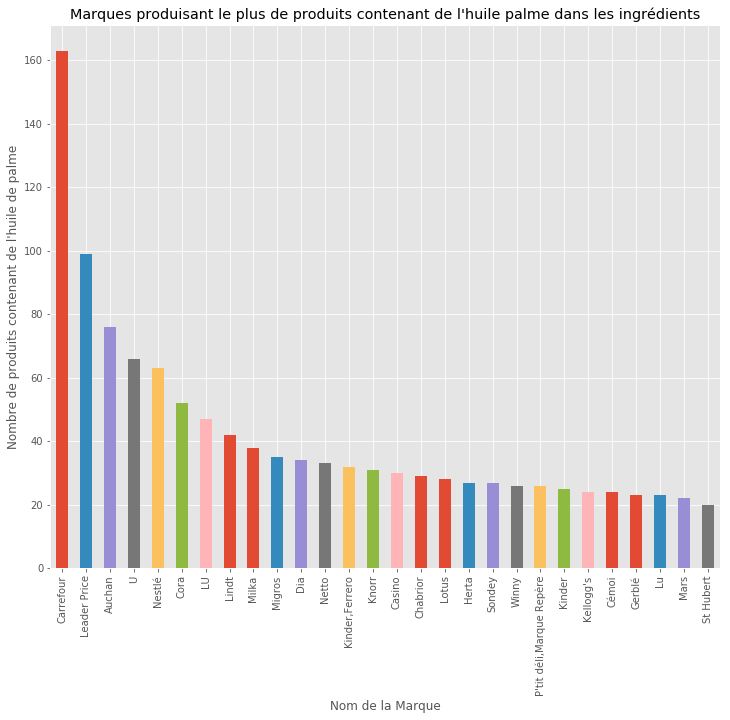

In [149]:

df_palmoil_topbrands['brands'].value_counts().plot.bar(figsize=(12,10))
plt.title("Marques produisant le plus de produits contenant de l'huile palme dans les ingrédients" )
plt.ylabel("Nombre de produits contenant de l'huile de palme")
plt.xlabel('Nom de la Marque')

In [188]:
def letter_to_int(letter):
    grade = list('abcde')
    if letter in grade:
        return grade.index(letter) + 1
df_palmoil['nutritiongrade_n']=[letter_to_int(x) for x in df_palmoil['nutrition_grade_fr']]




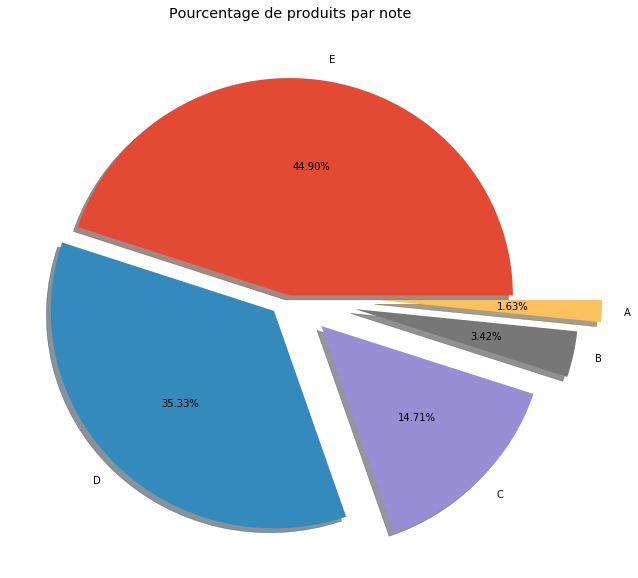

In [324]:
fig, ax = plt.subplots()
labels= 'E','D','C','B','A'
explode = (0, 0.1, 0.2, 0.3, 0.4)
df_palmoil['nutrition_grade_fr'].value_counts().plot(ax=ax, kind='pie',figsize=(10, 10),labels=labels,autopct='%1.2f%%',shadow=True,explode=explode)
plt.title("Pourcentage de produits par note" )
ax.set_ylabel("")
plt.show()

In [282]:
groupby_grade=df_palmoil[['ingredients_from_palm_oil_n','nutrition_grade_fr']].groupby(['nutrition_grade_fr','ingredients_from_palm_oil_n'])
dfsmall=groupby_grade.size().to_frame().reset_index()
dfsmall.columns=['nutrition_grade_fr','ingredients_from_palm_oil_n','count']
print(dfsmall[dfsmall['ingredients_from_palm_oil_n']==1])



  nutrition_grade_fr  ingredients_from_palm_oil_n  count
0                  a                          1.0     53
2                  b                          1.0    115
3                  c                          1.0    489
5                  d                          1.0   1166
7                  e                          1.0   1494


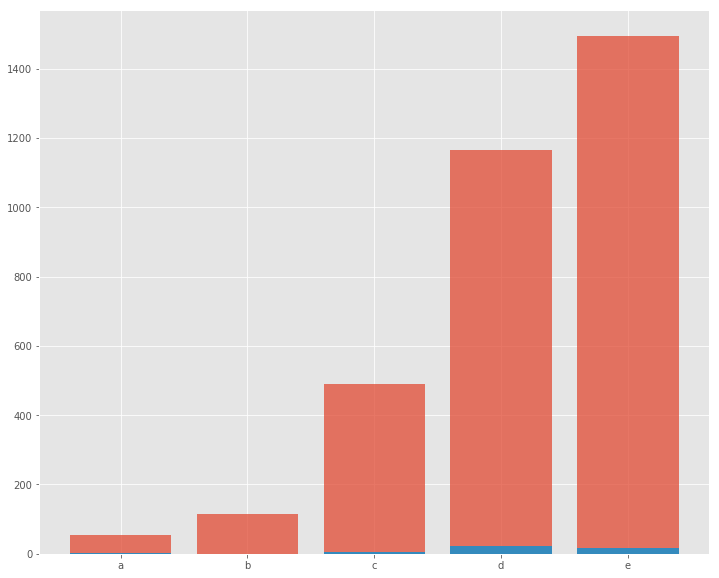

In [293]:
y1=dfsmall[dfsmall['ingredients_from_palm_oil_n']==1]['count']
y2=dfsmall[dfsmall['ingredients_from_palm_oil_n']==2]['count']
x1=dfsmall[dfsmall['ingredients_from_palm_oil_n']==1]['nutrition_grade_fr']
x2=dfsmall[dfsmall['ingredients_from_palm_oil_n']==2]['nutrition_grade_fr']
siz=dfsmall['count']
plt.figure(figsize=(12,10))
p1=plt.bar(x1, y1,alpha=0.75)
p2=plt.bar(x2, y2, alpha=1)
plt.show()
